# 코퍼스 순서
1. 문장 가져오기 values.tolist()
2. 토큰화 (문장단위) + stopwords
   - 2.5 특수문자+소문자 처리할때 원하지 않는 특정 고유명사들은 따로 if 로 한번 거르기!
3. 원형복원(WordNetLemmatizer) -> flatten -> Wordcloud+image
4. 문장단위 코퍼스 생성 corpus = [*map(lambda x: ' '.join(x) , token)]
5. TF-IDF
6. 각단어 빈도에대해 행으로 더하기 -> Wordcloud+image

In [1]:
%matplotlib inline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
import pandas as pd
import numpy as np

In [2]:
path_home= 'after_remove_hash_and_korean/'

from_biden=pd.read_csv(path_home+"from_Biden_without_hashtag.csv")
to_biden=pd.read_csv(path_home+"to_Biden_without_hashtag.csv")
from_trump=pd.read_csv(path_home+"from_Trump_without_hashtag.csv")
to_trump=pd.read_csv(path_home+"to_Trump_without_hashtag.csv")

# 전처리

In [3]:
from_biden=from_biden.text.values.tolist()
to_biden=to_biden.text.values.tolist()
from_trump=from_trump.text.values.tolist()
to_trump=to_trump.text.values.tolist()

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ["https","http","com","donald","trump","joe","biden","would", "election", "could", "also", "president","vote", "voters", "house", "run", "two", "rox", "reuters","way","go", "point", "take", "say"]
stopwords.extend(newStopWords)
stopWords = set(stopwords)


def tokenizing(document):
    token = []
    for sentence in document:
        clean_words=[]
        sentence = re.sub('[^a-zA-Z-]+',' ',sentence)

        for word in word_tokenize(sentence):
            if len(word)>2 and word.lower() not in stopWords:
                if word not in ['Trump','Biden']:
                    word = word.lower()
                clean_words.append(word)
        token.append(clean_words)
    return token

In [5]:
from_biden=tokenizing(from_biden)
to_biden=tokenizing(to_biden)
from_trump=tokenizing(from_trump)
to_trump=tokenizing(to_trump)

In [6]:
#원형 복원
WL = WordNetLemmatizer()

In [7]:
def proper_lemmatize(word,tag):
    
    if tag[0]=='V':
        ret= WL.lemmatize(word,'v')
    elif tag[0]=='J':
        ret= WL.lemmatize(word,'a')
    elif tag[0]=='NNP':
        ret= word
    else:
        ret= WL.lemmatize(word)
        
    return ret if ret not in stopWords else ' '

def lemmatizer(sentence_token):
    for i in range(len(sentence_token)):
        sentence_token[i] = [proper_lemmatize(word,tag) for (word,tag) in pos_tag(sentence_token[i])]
    return sentence_token

In [8]:
from_biden=lemmatizer(from_biden)

to_biden=lemmatizer(to_biden)

from_trump=lemmatizer(from_trump)

to_trump=lemmatizer(to_trump)

In [9]:
def make_sent_corpus(lemmatized_token):
    sent_corpus = [*map(lambda x: ' '.join(x) , lemmatized_token)]
    return sent_corpus

In [10]:
from_biden_corpus=make_sent_corpus(from_biden)
to_biden_corpus=make_sent_corpus(to_biden)
from_trump_corpus=make_sent_corpus(from_trump)
to_trump_corpus=make_sent_corpus(to_trump)

In [11]:
to_trump_corpus[534]

'get hand place -person debate much better american think'

In [12]:
to_biden_corpus[4]

'whoever write tweet get another pudding cup'

In [13]:
from_trump_corpus[4]

'good luck sean compton winner everything los angeles timeshow new nightly three-hour news program might shake medium latimes entertainment-arts business story wgn-americas-newsnation-looks-for-viewers-who-want-their-news-served-up-opinion-free'

In [14]:
from_biden_corpus[4]

'tonight decline rebuke violence even repudiate one supporter charge murder weak scar hatred stirred put end'

# WordCloud by TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
def TF_IDF(corpus):
    tfidfv = TfidfVectorizer(min_df=2).fit(corpus)
    return tfidfv

In [17]:
from_biden_tfidf=TF_IDF(from_biden_corpus)
to_biden_tfidf=TF_IDF(to_biden_corpus)
from_trump_tfidf=TF_IDF(from_trump_corpus)
to_trump_tfidf=TF_IDF(to_trump_corpus)

In [18]:
# from_biden_tfidf.transform(from_biden_corpus).toarray()
# from_biden_tfidf.vocabulary_

In [19]:
from_biden_TFIDF_matrix = from_biden_tfidf.transform(from_biden_corpus).toarray()
to_biden_TFIDF_matrix = to_biden_tfidf.transform(to_biden_corpus).toarray()
from_trump_TFIDF_matrix = from_trump_tfidf.transform(from_trump_corpus).toarray()
to_trump_TFIDF_matrix = to_trump_tfidf.transform(to_trump_corpus).toarray()

In [20]:
print(from_biden_TFIDF_matrix.shape)
print(to_biden_TFIDF_matrix.shape)
print(from_trump_TFIDF_matrix.shape)
print(to_trump_TFIDF_matrix.shape)

(526, 1041)
(977, 1129)
(705, 1432)
(968, 1324)


In [21]:
from_biden_word_index = {idx:word for (word,idx) in from_biden_tfidf.vocabulary_.items()}
to_biden_word_index = {idx:word for (word,idx) in to_biden_tfidf.vocabulary_.items()}
from_trump_word_index = {idx:word for (word,idx) in from_trump_tfidf.vocabulary_.items()}
to_trump_word_index = {idx:word for (word,idx) in to_trump_tfidf.vocabulary_.items()}

In [22]:
from_biden_TFIDF_sum = from_biden_TFIDF_matrix.sum(axis=0)
to_biden_TFIDF_sum = to_biden_TFIDF_matrix.sum(axis=0)
from_trump_TFIDF_sum = from_trump_TFIDF_matrix.sum(axis=0)
to_trump_TFIDF_sum = to_trump_TFIDF_matrix.sum(axis=0)

In [23]:
from_biden_TFIDF_frequencies = {from_biden_word_index[i]:from_biden_TFIDF_sum[i] for i in range(len(from_biden_tfidf.vocabulary_))}
to_biden_TFIDF_frequencies = {to_biden_word_index[i]:to_biden_TFIDF_sum[i] for i in range(len(to_biden_tfidf.vocabulary_))}
from_trump_TFIDF_frequencies = {from_trump_word_index[i]:from_trump_TFIDF_sum[i] for i in range(len(from_trump_tfidf.vocabulary_))}
to_trump_TFIDF_frequencies = {to_trump_word_index[i]:to_trump_TFIDF_sum[i] for i in range(len(to_trump_tfidf.vocabulary_))}

In [24]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

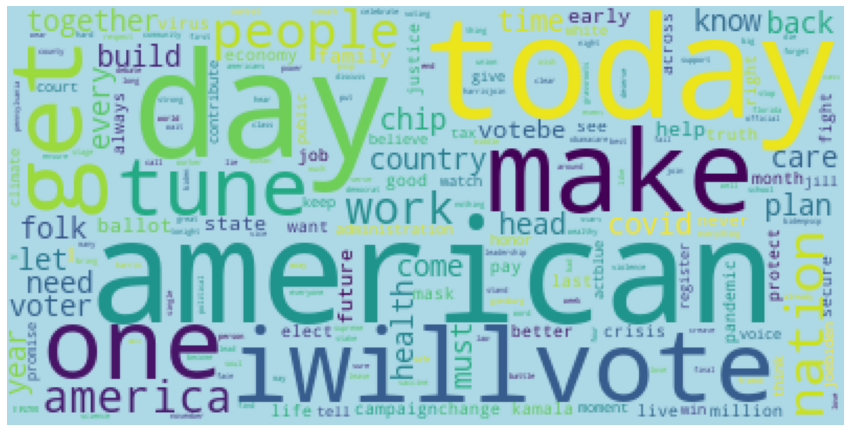

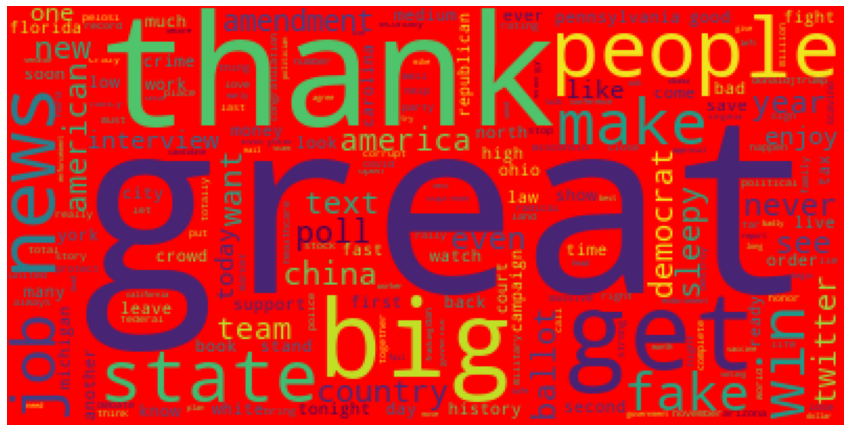

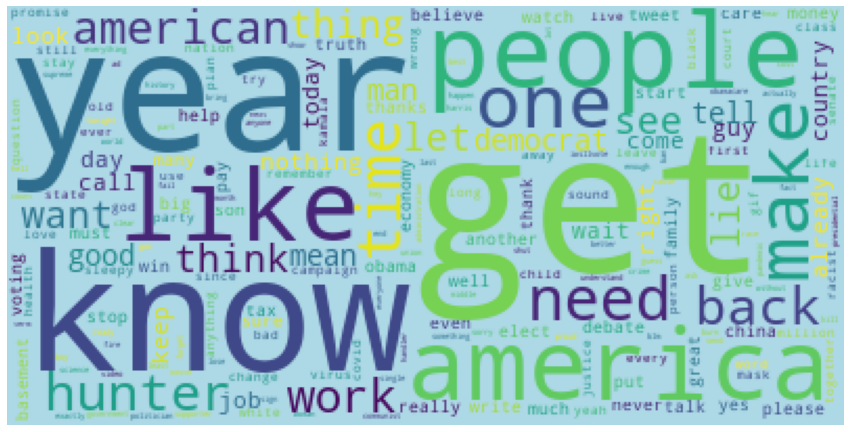

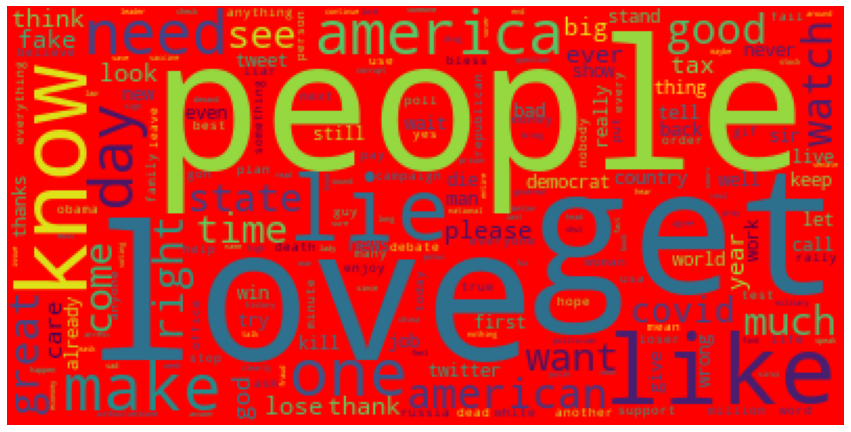

In [25]:
from_biden_wordcloud = WordCloud(relative_scaling = 0.2,
                     background_color='lightblue',
                     ).generate_from_frequencies(from_biden_TFIDF_frequencies)
plt.figure(figsize=(15,10))
plt.imshow(from_biden_wordcloud)
plt.axis("off")
plt.show()

from_trump_wordcloud = WordCloud(relative_scaling = 0.2,
                     background_color='red',
                     ).generate_from_frequencies(from_trump_TFIDF_frequencies)
plt.figure(figsize=(15,10))
plt.imshow(from_trump_wordcloud)
plt.axis("off")
plt.show()

to_biden_wordcloud = WordCloud(relative_scaling = 0.2,
                     background_color='lightblue',
                     ).generate_from_frequencies(to_biden_TFIDF_frequencies)
plt.figure(figsize=(15,10))
plt.imshow(to_biden_wordcloud)
plt.axis("off")
plt.show()

to_trump_wordcloud = WordCloud(relative_scaling = 0.2,
                     background_color='red',
                     ).generate_from_frequencies(to_trump_TFIDF_frequencies)
plt.figure(figsize=(15,10))
plt.imshow(to_trump_wordcloud)
plt.axis("off")
plt.show()

# WordCloud by TF

counter 정수인코딩

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

fbc_text=[]
tbc_text=[]
ftc_text=[]
ttc_text=[]
# from_biden_corpus
# to_biden_corpus
# from_trump_corpus
# to_trump_corpus
vector_fbc = CountVectorizer()
vector_tbc = CountVectorizer()
vector_ftc = CountVectorizer()
vector_ttc = CountVectorizer()
# print(vector.fit_transform(to_trump_corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
# print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

# 문장 단위의 코퍼스를 전체 문장으로 결합
# 단어 단위로 추출하기 위해
# 리스트 안에 넣어주기
fbc_text.append(' '.join(from_biden_corpus))
tbc_text.append(' '.join(to_biden_corpus))
ftc_text.append(' '.join(from_trump_corpus))
ttc_text.append(' '.join(to_trump_corpus))

# 문서가 1개 짜리인 단어 콜랙션 만들기
fbc=vector_fbc.fit_transform(fbc_text)
tbc=vector_tbc.fit_transform(tbc_text)
ftc=vector_ftc.fit_transform(ftc_text)
ttc=vector_ttc.fit_transform(ttc_text)

In [27]:
vector_fbc.get_feature_names()
fbc.toarray()

array([[1, 1, 8, ..., 2, 1, 2]])

In [28]:
fb=pd.DataFrame(fbc.toarray(), columns=vector_fbc.get_feature_names()).T
ft=pd.DataFrame(ftc.toarray(), columns=vector_ftc.get_feature_names()).T
tb=pd.DataFrame(tbc.toarray(), columns=vector_tbc.get_feature_names()).T
tt=pd.DataFrame(ttc.toarray(), columns=vector_ttc.get_feature_names()).T

In [29]:
fb.rename(columns={0:'frequency'}, inplace=True)
ft.rename(columns={0:'frequency'}, inplace=True)
tb.rename(columns={0:'frequency'}, inplace=True)
tt.rename(columns={0:'frequency'}, inplace=True)
fb=fb.to_dict()
ft=ft.to_dict()
tb=tb.to_dict()
tt=tt.to_dict()

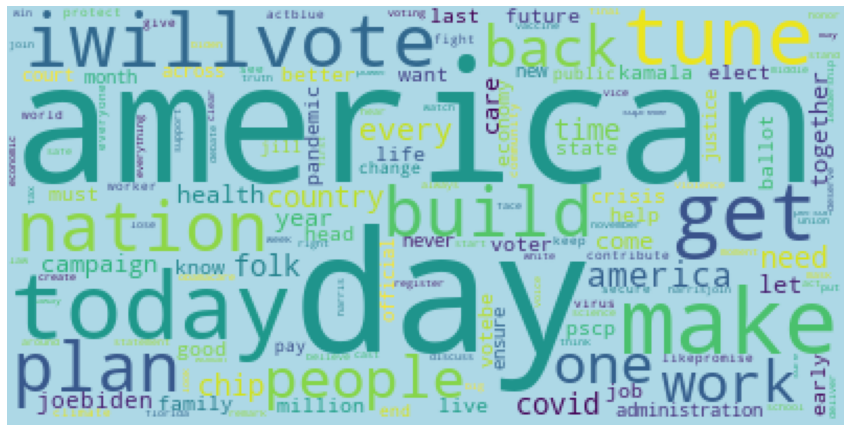

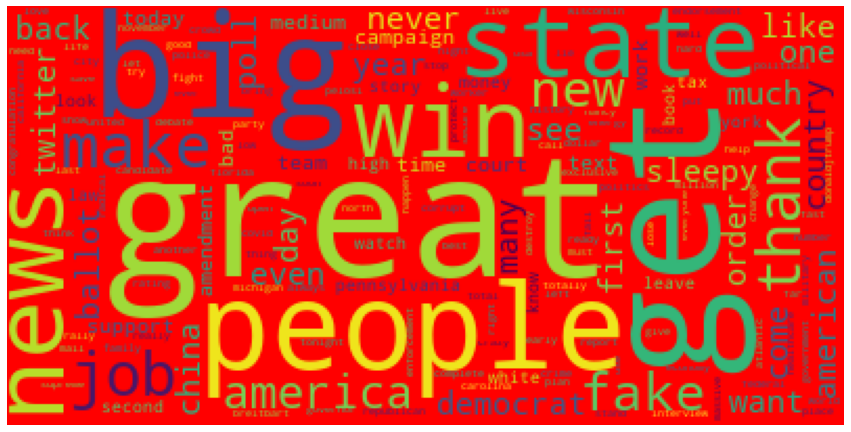

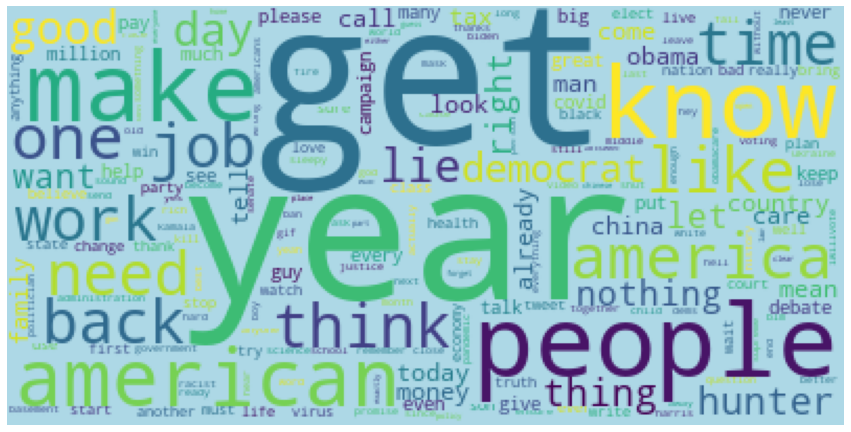

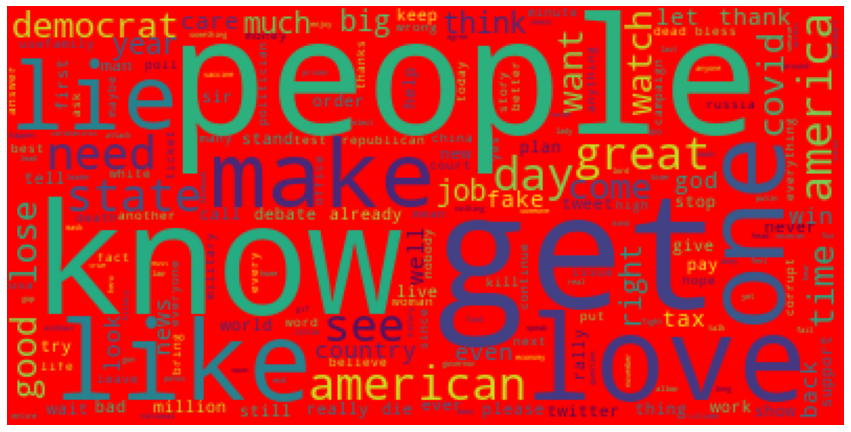

In [33]:
fbTF = WordCloud(relative_scaling = 0.2,
                     background_color='lightblue',
                     ).generate_from_frequencies(fb['frequency'])
plt.figure(figsize=(15,10))
plt.imshow(fbTF)
plt.axis("off")
plt.show()

ftTF = WordCloud(relative_scaling = 0.2,
                     background_color='red',
                     ).generate_from_frequencies(ft['frequency'])
plt.figure(figsize=(15,10))
plt.imshow(ftTF)
plt.axis("off")
plt.show()

tbTF = WordCloud(relative_scaling = 0.2,
                     background_color='lightblue',
                     ).generate_from_frequencies(tb['frequency'])
plt.figure(figsize=(15,10))
plt.imshow(tbTF)
plt.axis("off")
plt.show()

ttTF = WordCloud(relative_scaling = 0.2,
                     background_color='red',
                     ).generate_from_frequencies(tt['frequency'])
plt.figure(figsize=(15,10))
plt.imshow(ttTF)
plt.axis("off")
plt.show()

# plotly

In [34]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

### TF plot

In [35]:
fb_df=pd.DataFrame(fbc.toarray(), columns=vector_fbc.get_feature_names()).T
ft_df=pd.DataFrame(ftc.toarray(), columns=vector_ftc.get_feature_names()).T
tb_df=pd.DataFrame(tbc.toarray(), columns=vector_tbc.get_feature_names()).T
tt_df=pd.DataFrame(ttc.toarray(), columns=vector_ttc.get_feature_names()).T

In [36]:
fb_df.reset_index(inplace=True)
ft_df.reset_index(inplace=True)
tb_df.reset_index(inplace=True)
tt_df.reset_index(inplace=True)

In [37]:
fb_df.rename(columns={'index':'Word', 0:'Frequency'}, inplace=True)
ft_df.rename(columns={'index':'Word', 0:'Frequency'}, inplace=True)
tb_df.rename(columns={'index':'Word', 0:'Frequency'}, inplace=True)
tt_df.rename(columns={'index':'Word', 0:'Frequency'}, inplace=True)

In [38]:
fb_df.sort_values(by='Frequency', ascending=False, inplace=True)
ft_df.sort_values(by='Frequency', ascending=False, inplace=True)
tb_df.sort_values(by='Frequency', ascending=False, inplace=True)
tt_df.sort_values(by='Frequency', ascending=False, inplace=True)

In [39]:
fb_df_fig = px.bar(fb_df[:20], x='Word',y='Frequency', color='Frequency', color_continuous_scale=px.colors.sequential.Cividis_r, title='From Biden\'s Twitter')
ft_df_fig = px.bar(ft_df[:20], x='Word',y='Frequency',color='Frequency', color_continuous_scale=["green", "purple", "red"], title='From Trump\'s Twitter')
tb_df_fig = px.bar(tb_df[:20], x='Word',y='Frequency',color='Frequency', color_continuous_scale=px.colors.sequential.Cividis_r, title='People to Biden\'s Twitter')
tt_df_fig = px.bar(tt_df[:20], x='Word',y='Frequency',color='Frequency', color_continuous_scale=["green", "purple", "red"], title='People to Trump\'s Twitter')

In [47]:
fb_df_fig.show()
ft_df_fig.show()
tb_df_fig.show()
tt_df_fig.show()

### TF-IDF plot

In [41]:
from_biden_plot=pd.DataFrame(from_biden_TFIDF_frequencies, index=['frequency']).T
to_biden_plot=pd.DataFrame(to_biden_TFIDF_frequencies, index=['frequency']).T
from_trump_plot=pd.DataFrame(from_trump_TFIDF_frequencies, index=['frequency']).T
to_trump_plot=pd.DataFrame(to_trump_TFIDF_frequencies, index=['frequency']).T

In [42]:
from_biden_plot.reset_index(inplace=True)
to_biden_plot.reset_index(inplace=True)
from_trump_plot.reset_index(inplace=True)
to_trump_plot.reset_index(inplace=True)

In [43]:
from_biden_plot.rename(columns={'index':'Word', 'frequency':'Frequency'}, inplace=True)
to_biden_plot.rename(columns={'index':'Word', 'frequency':'Frequency'}, inplace=True)
from_trump_plot.rename(columns={'index':'Word', 'frequency':'Frequency'}, inplace=True)
to_trump_plot.rename(columns={'index':'Word', 'frequency':'Frequency'}, inplace=True)

In [44]:
from_biden_plot.sort_values(by='Frequency', ascending=False, inplace=True)
to_biden_plot.sort_values(by='Frequency', ascending=False, inplace=True)
from_trump_plot.sort_values(by='Frequency', ascending=False, inplace=True)
to_trump_plot.sort_values(by='Frequency', ascending=False, inplace=True)

In [45]:
from_biden_plot_fig = px.bar(from_biden_plot[:20], x='Word',y='Frequency', color='Frequency', color_continuous_scale=px.colors.sequential.Cividis_r)
to_biden_plot_fig = px.bar(to_biden_plot[:20], x='Word',y='Frequency',color='Frequency', color_continuous_scale=px.colors.sequential.Cividis_r)
from_trump_plot_fig = px.bar(from_trump_plot[:20], x='Word',y='Frequency',color='Frequency', color_continuous_scale=["green", "purple", "red"])
to_trump_plot_fig = px.bar(to_trump_plot[:20], x='Word',y='Frequency',color='Frequency', color_continuous_scale=["green", "purple", "red"])

In [46]:
from_biden_plot_fig.show()

to_biden_plot_fig.show()

from_trump_plot_fig.show()

to_trump_plot_fig.show()